<img src = "img/alert.png" width="65%" align="center">

In [1]:
from pymongo import MongoClient
# pprint library is used to make the output look more pretty
from pprint import pprint
import pandas as pd
import requests
import os
session = requests.Session() 

<h1> Server Address and Login Credentials

In [2]:
qlik_alerting_server = '192.168.56.215'
username = os.getenv('ALERTING_USER')
pwd = os.getenv('ALERTING_PWD')

<img src="img/post.png" width="8%" align="left"> 
<br>
<h1> Qlik Alerting: user login

In [3]:
login_header = {
    'Content-Type': 'application/json',
    'User-Agent': 'Mozilla/5.0'
}

data = {
    'user': username,
    'password': pwd
}

request_url= 'http://{server_ip}:4551/api/login'.format(server_ip = qlik_alerting_server)

s = requests.session()
s.headers.update(login_header)
s_req = s.post(request_url, headers=login_header, json=data)
s_req

<Response [200]>

In [4]:
 print("response headers :", s_req.headers)

response headers : {'Access-Control-Allow-Origin': '*', 'Content-Security-Policy': "default-src 'none';img-src 'self' data:;script-src 'self' 'unsafe-eval';connect-src 'self';style-src 'self' 'unsafe-inline';manifest-src 'self';", 'X-DNS-Prefetch-Control': 'off', 'X-Frame-Options': 'SAMEORIGIN', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-RateLimit-Limit': '20', 'X-RateLimit-Remaining': '19', 'Date': 'Tue, 16 Jun 2020 12:15:49 GMT', 'X-RateLimit-Reset': '1592309848', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '183', 'ETag': 'W/"b7-nUoQ/19Nu/INkJbkRESFp32Uwko"', 'Connection': 'keep-alive'}


In [5]:
 s_req.json()

{'token': 'vit506wintt3lwf3',
 'userId': '484b6b77-48d9-42ae-b2ec-e559626fdadf',
 'userName': 'podium',
 'firstName': 'podium',
 'isAdmin': True,
 'license': 'professional',
 'expiresOn': 1592311549286}

<h3> Retrieve Token and UserId

In [6]:
s_req.json()
token = s_req.json().get('token')
user_id = s_req.json().get('userId')
license_type = s_req.json().get('license')
print("Token ", token)
print("UserId ", user_id)

Token  vit506wintt3lwf3
UserId  484b6b77-48d9-42ae-b2ec-e559626fdadf


<h2>Qlik Alerting Retrieve user alerts

In [7]:
url = "http://{server_ip}:4551/api/alerts/data".format(server_ip=qlik_alerting_server)
s = requests.session()
s.headers.update({'User-Agent': 'Mozilla/5.0', 
                 'Authorization': token,
                  'UserId': user_id})
s_req = s.get(url)
s_req

<Response [200]>

[{'_id': 'aa7a31e0-6191-4281-9bdb-2373fd97a9f0',
  'name': 'alert_sul_venduto',
  'description': 'Questo è un alert sulle vendite ',
  'query': {'table': True,
   'dimensions': [{'label': 'EmployeeName', 'def': '[EmployeeName]'}],
   'measures': [{'label': 'sum([Sales])',
     'def': '=sum([Sales])',
     'format': '0.00a'}],
   'filters': [],
   'bookmark': None,
   'app': '5e3c7b02-736c-4d39-bfd1-fbacc2a64508',
   'sheet': '7b6196c4-2074-4f30-a772-a82dc8b8bb9d',
   'sort': {'by': 1, 'ascending': False}},
  'condition': {'logic': ['0 and 1'],
   'list': [{'index': '1',
     'type': 'manual',
     'operator': 'lt',
     'value': '150000'},
    {'index': 1, 'type': 'manual', 'operator': 'gt', 'value': '0'}]},
  'channels': ['email', 'mobile'],
  'notification': {'frequency': 'always',
   'type': 'data',
   'message': {'subject': '', 'body': ''}},
  'onReload': True,
  'digest': False,
  'source': 'qlik',
  'owner': '484b6b77-48d9-42ae-b2ec-e559626fdadf',
  'recipients': ['484b6b77-48d9-
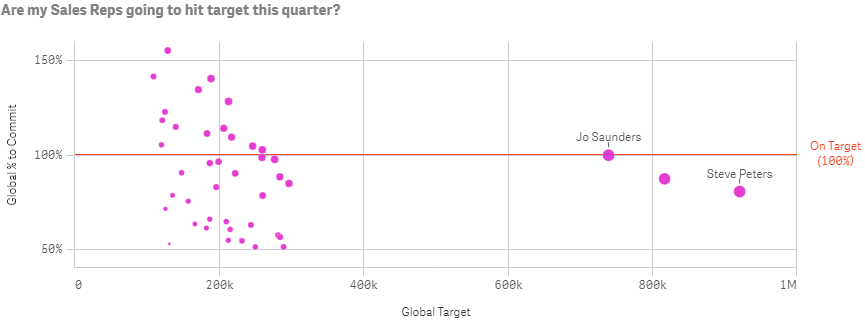
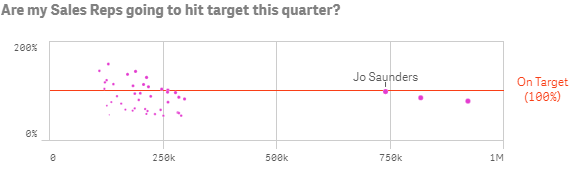

In [8]:
s_req.json()

<h3> Retrieve information about my warning_APAC alert

{'_id': 'b9e1971c-dc7a-4737-9e69-efff709283fe',
 'channels': ['email', 'mobile'],
 'condition': {'list': [{'index': '1',
                         'operator': 'lt',
                         'type': 'manual',
                         'value': '0.7'}],
               'logic': ['0']},
 'createdAt': 1590049795024,
 'description': 'This is an alert for APAC Sales',
 'digest': False,
 'groups': [],
 'impersonate': False,
 'isActive': False,
 'name': 'warning_APAC',
 'notification': {'custom': True,
                  'frequency': 'always',
                  'message': {'body': '<!DOCTYPE HTML>\n'
                                      '<html lang="en">\n'
                                      '\n'
                                      '<head>\n'
                                      '    <meta http-equiv="X-UA-Compatible" '
                                      'content="IE=edge">\n'
                                      '    <meta http-equiv="Content-Type" '
                                   
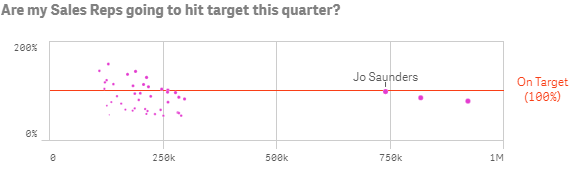

In [9]:
for alert in s_req.json():
    if alert.get('name')=='warning_APAC':
        pprint(alert)
        alert_id = alert.get('_id')

<img src="img/get.png" width="8%" align="left"> 
<br>
<h1> Retrieve Alert by Id

In [10]:
url = "http://{server_ip}:4551/api/alerts/data/{alert_id}".format(server_ip=qlik_alerting_server, alert_id=alert_id)
s = requests.session()
s.headers.update({'User-Agent': 'Mozilla/5.0', 
                 'Authorization': token,
                  'UserId': user_id})
s_req = s.get(url)
s_req

<Response [200]>

{'_id': 'b9e1971c-dc7a-4737-9e69-efff709283fe',
 'name': 'warning_APAC',
 'description': 'This is an alert for APAC Sales',
 'query': {'table': True,
  'dimensions': [{'label': 'Sales Rep', 'id': 'yKdjjL', 'def': 'Sales Rep'}],
  'measures': [{'id': 'hqhWSH', 'label': '% to Target', 'format': '0.00a'}],
  'filters': [],
  'bookmark': '061d25f9-4740-42cc-b7f4-a3ee6008fddc',
  'app': '28ef32f1-05e8-47e0-aa80-a4a11529ca6e',
  'sheet': 'c2f44eff-46c7-4c95-9574-2fe0866d8d13',
  'sort': {'by': 1, 'ascending': False}},
 'condition': {'logic': ['0'],
  'list': [{'index': '1',
    'type': 'manual',
    'operator': 'lt',
    'value': '0.7'}]},
 'channels': ['email', 'mobile'],
 'notification': {'custom': True,
  'frequency': 'always',
  'type': 'data',
  'message': {'subject': '',
   'body': '<!DOCTYPE HTML>\n<html lang="en">\n\n<head>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n    <meta name="viewport" con
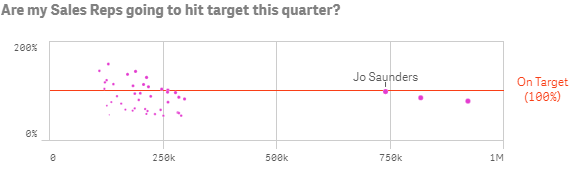

In [11]:
s_req.json()

<h2> Prepare json to save

{'channels': ['email', 'mobile'],
 'condition': {'list': [{'index': '1',
                         'operator': 'lt',
                         'type': 'manual',
                         'value': '0.7'}],
               'logic': ['0']},
 'description': 'This is an alert for APAC Sales',
 'digest': False,
 'groups': [],
 'impersonate': False,
 'name': 'warning_APAC',
 'notification': {'custom': True,
                  'frequency': 'always',
                  'message': {'body': '<!DOCTYPE HTML>\n'
                                      '<html lang="en">\n'
                                      '\n'
                                      '<head>\n'
                                      '    <meta http-equiv="X-UA-Compatible" '
                                      'content="IE=edge">\n'
                                      '    <meta http-equiv="Content-Type" '
                                      'content="text/html; charset=UTF-8">\n'
                                      '    <meta name=
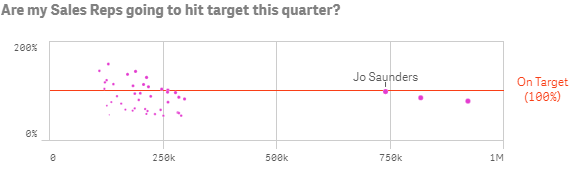

In [12]:
output_keys = ["name","description", "onReload", "digest","source","query","condition", "impersonate"
        ,"recipients","groups","channels","schedule","notification","unsubscribed"]
output_dict = {}
for key in output_keys:
    output_dict[key]=s_req.json().get(key)
pprint(output_dict)

<h2> Read HTML template

In [13]:
import codecs
f=codecs.open("dimension.html", 'r')
html_body = str(f.read())

In [14]:
part1_html = html_body.split("for the details.")[0]
part2_html =  html_body.split("for the details.")[1]

In [15]:
import base64
with open("img_to_load.png", "rb") as image_file:
    base64_img = base64.b64encode(image_file.read())

'<img alt="my image" src="/>'
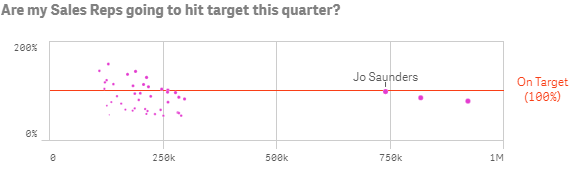

In [16]:
img_html = '<img alt="my image" src=data:image/png;base64,' +str(base64_img)[2:-1] +'"/>'
img_html

In [17]:
final_html = part1_html +"for the details."+img_html + part2_html

{'name': 'warning_APAC',
 'description': 'This is an alert for APAC Sales',
 'onReload': True,
 'digest': False,
 'source': 'qlik',
 'query': {'table': True,
  'dimensions': [{'label': 'Sales Rep', 'id': 'yKdjjL', 'def': 'Sales Rep'}],
  'measures': [{'id': 'hqhWSH', 'label': '% to Target', 'format': '0.00a'}],
  'filters': [],
  'bookmark': '061d25f9-4740-42cc-b7f4-a3ee6008fddc',
  'app': '28ef32f1-05e8-47e0-aa80-a4a11529ca6e',
  'sheet': 'c2f44eff-46c7-4c95-9574-2fe0866d8d13',
  'sort': {'by': 1, 'ascending': False}},
 'condition': {'logic': ['0'],
  'list': [{'index': '1',
    'type': 'manual',
    'operator': 'lt',
    'value': '0.7'}]},
 'impersonate': False,
 'recipients': ['484b6b77-48d9-42ae-b2ec-e559626fdadf'],
 'groups': [],
 'channels': ['email', 'mobile'],
 'schedule': {'isActive': False,
  'type': 'interval',
  'start': 0,
  'end': None,
  'interval': 600000,
  'time': [],
  'minHour': None,
  'maxHour': None,
  'dayOfWeek': [],
  'dayOfMonth': []},
 'notification': {'cust
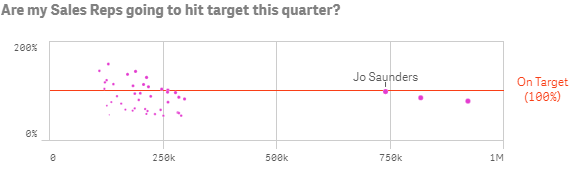

In [18]:
output_dict['notification']['message']['body']=final_html
output_dict

<img src="img/put.png" width="8%" align="left"> 
<br>
<h1> Save modified Alert with inserted graph image

In [19]:
put_header = {
    'Content-Type': 'application/json;charset=UTF-8',
    'Accept': 'application/json, text/plain, */*',
    'Authorization': token,
    'UserId': user_id

}
s.headers.update(put_header)
r = s.put("http://{server_ip}:4551/api/alerts/data/{alert_id}".format(server_ip = qlik_alerting_server, alert_id=alert_id),  headers = put_header, json=[output_dict])
r

<Response [200]>

In [20]:
r.json()

{'result': "Alert didn't change", 'id': 'b9e1971c-dc7a-4737-9e69-efff709283fe'}